### Name: Rahul Kumar
### Roll No: 2201110

## Bays classifier for Text classification

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


In [31]:
from sklearn.datasets import fetch_20newsgroups

In [ ]:
data = fetch_20newsgroups()
data.target_names


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [33]:
categories = ['talk.religion.misc', 'soc.religion.christian',  'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)


In [34]:
print(train.data[6])

From: will@rins.ryukoku.ac.jp (William Reiken)
Subject: Re: nuclear waste
Organization: Ryukoku Univ., Seta, Japan
Lines: 4


	Thanks for the Update.

							Will...



In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline


In [36]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [37]:
model.fit(train.data, train.target)
labels = model.predict(test.data)


In [38]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)


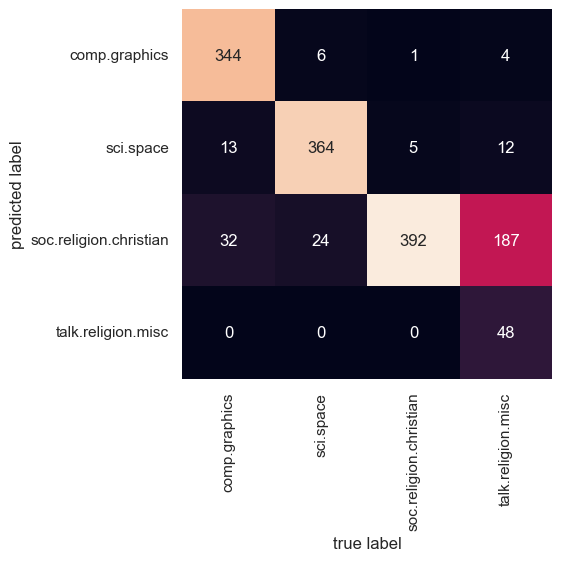

In [39]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');


In [40]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]


In [41]:
predict_category('sending a payload to the ISS')

'sci.space'

In [42]:

predict_category('discussing islam vs atheism')


'soc.religion.christian'

In [43]:
predict_category('determining the screen resolution')

'comp.graphics'